In [10]:
# -*- coding: utf-8 -*-
"""
QUESTION 1
"""
print("----------- QUESTION 1 -----------")
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
import nltk
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train',random_state=42)
dictt = {}
for i in newsgroups_train.target_names:
		training_data = fetch_20newsgroups(subset='train', categories=[i],random_state=42)
		dictt[i] = len(training_data.data)


fig,ax = plt.subplots()
plt.bar(list(newsgroups_train.target_names), list(dictt.values()))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=20, fontsize=10)
plt.xlabel('Categories')
plt.ylabel('# Documents')
plt.title('Histogram of training documents')
plt.show()

"""
plt.hist(newsgroups_train.target)
plt.xticks(range(20), newsgroups_train.target_names)
locs, labels = plt.xticks()
plt.setp(labels, rotation=25)
plt.xlabel('Categories')
plt.ylabel('# Documents')
plt.title('Histogram of training documents')
plt.grid(True)
plt.show()
"""

----------- QUESTION 1 -----------
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ninga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ninga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ninga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ninga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 640x480 with 1 Axes>

"\nplt.hist(newsgroups_train.target)\nplt.xticks(range(20), newsgroups_train.target_names)\nlocs, labels = plt.xticks()\nplt.setp(labels, rotation=25)\nplt.xlabel('Categories')\nplt.ylabel('# Documents')\nplt.title('Histogram of training documents')\nplt.grid(True)\nplt.show()\n"

In [11]:
"""
QUESTION 2
"""
print("----------- QUESTION 2 -----------")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, 
                                   shuffle = True, random_state = 42)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, 
                                  shuffle = True, random_state = 42)



stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

#  Converts Penn Treebank tags to WordNet.
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

    
wnl = nltk.wordnet.WordNetLemmatizer()    

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

analyzer = text.CountVectorizer().build_analyzer()

# Remove stopword, number and set min_df = 3
vectorizer = text.CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc, token_pattern = r'(?u)\b[A-Za-z][A-Za-z]+\b')

# For the train data
X_train_counts = vectorizer.fit_transform(train_dataset.data)
X_train_counts.toarray()

# For the test data
X_test_counts = vectorizer.transform(test_dataset.data)
X_test_counts.toarray()

# The following is the tfidf part
# For the train data
X_train_tfidf = text.TfidfTransformer().fit_transform(X_train_counts)
print('Shape of TF-IDF train matrices subset: ')
print(X_train_tfidf.shape)

# For the test data
X_test_tfidf = text.TfidfTransformer().fit_transform(X_test_counts)
print('Shape of TF-IDF test matrices subset: ')
print(X_test_tfidf.shape)

----------- QUESTION 2 -----------
Shape of TF-IDF train matrices subset: 
(4732, 16292)
Shape of TF-IDF test matrices subset: 
(3150, 16292)


In [16]:
"""
QUESTION 3
"""
print("----------- QUESTION 3 -----------")

# LSI dimensionality reduction

from sklearn.decomposition import TruncatedSVD

lsi = TruncatedSVD(n_components=50, random_state=42) 
X_train_LSI = lsi.fit_transform(X_train_tfidf)
X_test_LSI = lsi.transform(X_test_tfidf)
print("the shape of the LSI training matrix is ", X_train_LSI.shape)
print("the shape of the LSI testing matrix is ", X_test_LSI.shape)


# NMF dimensionality reduction

from sklearn.decomposition import NMF

nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)
print("the shape of the NMF training matrix is ", X_train_NMF.shape)
print("the shape of the NMF testing matrix is ", X_test_NMF.shape)


# compare LSI & NMF
"""
# for LSI
U_train = X_train_LSI
U_test = X_test_LSI
Sigma = lsi.explained_variance_ratio_
VT = lsi.components_
print(VT.shape)
print(Sigma.shape)
sum_train_LSI = np.sum(np.array(X_train_tfidf - (U_train.dot(Sigma)).dot(VT))**2)
sum_test_LSI = np.sum(np.array(X_test_tfidf - (U_test.dot(Sigma)).dot(VT))**2)
print(sum_train_LSI)
print(sum_test_LSI)
"""
# for NMF
W_train = X_train_NMF
W_test = X_test_NMF
H = nmf.components_
sum_train_NMF = np.sum(np.array(X_train_tfidf - W_train.dot(H))**2)
sum_test_NMF = np.sum(np.array(X_test_tfidf - W_test.dot(H))**2)
print(sum_train_NMF)
print(sum_test_NMF)




----------- QUESTION 3 -----------
the shape of the LSI training matrix is  (4732, 50)
the shape of the LSI testing matrix is  (3150, 50)
the shape of the NMF training matrix is  (4732, 50)
the shape of the NMF testing matrix is  (3150, 50)
4142.637405379719
2838.3214283816583


----------- QUESTION 4 -----------

Hard Margin ----------------------------


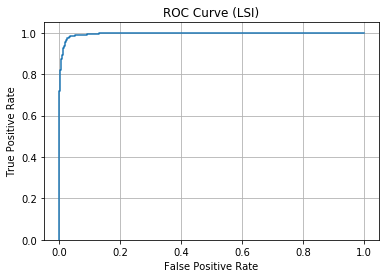

Confusion Matrix: 
[[1515   45]
 [  42 1548]]
Accuracy: 0.9723809523809523
Recall: 0.9735849056603774
Precision: 0.9717514124293786
F1-Score: 0.9726672950047125

Soft Margin ----------------------------


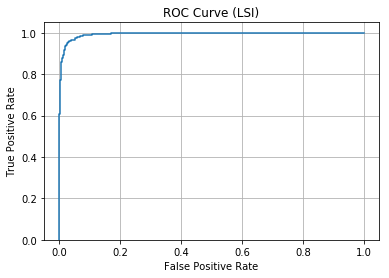

Confusion Matrix: 
[[ 540 1020]
 [   0 1590]]
Accuracy: 0.6761904761904762
Recall: 1.0
Precision: 0.6091954022988506
F1-Score: 0.7571428571428572


In [17]:
"""
QUESTION 4
"""
print("----------- QUESTION 4 -----------")
from sklearn.svm import LinearSVC
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score

cat_0 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
cat_1 = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

classes = ['Computer Technology', 'Recreational Activity']

# Classify the dataset into 2 categories
def classify(dataset):
    cat = []
    for i in dataset.target:
        if(i < 4):
            cat.append(0)
        else: 
            cat.append(1)
    return(cat)


y_train = classify(train_dataset)    
y_test = classify(test_dataset)              

svm_hard = LinearSVC(C = 1000, random_state = 42)
svm_soft = LinearSVC(C = 0.0001, random_state = 42)

def question4(svm):
    svm.fit(X_train_LSI, y_train)	
    
    # ----------------------
    # ROC Curves
    test_score = svm.decision_function(X_test_LSI)
    FPR, TPR, threshold = roc_curve(y_test, test_score)
    
    # Plot ROC
    fig,ax = plt.subplots()
    plt.plot(FPR, TPR)
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (LSI)')
    plt.grid()
    plt.show()
    
    # ----------------------
    # Metrics
    y_test_predict = svm.predict(X_test_LSI)
    
    confusionMatrix = confusion_matrix(y_test, y_test_predict)
    accuracy = accuracy_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict)
    f1_score = 2/((1/recall) + (1/precision))
    
    print('Confusion Matrix: ')
    print(confusionMatrix)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1-Score:', f1_score)


print('\nHard Margin ----------------------------')
question4(svm_hard)
print('\nSoft Margin ----------------------------')
question4(svm_soft)

----------- QUESTION 5 -----------
--------ROC curve and scores without regularization--------


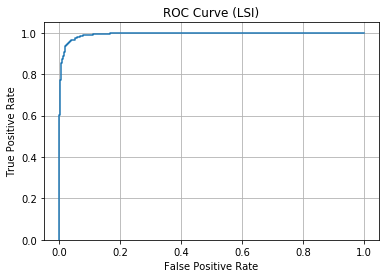

Confusion Matrix: 
[[  78 1482]
 [   0 1590]]
Accuracy: 0.5295238095238095
Recall: 1.0
Precision: 0.517578125
F1-Score: 0.6821106821106822





--------find the best k for L1 regularization--------


D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:113

the score list is  [0.33485689985281036, 0.8887268757299228, 0.9564255566832308, 0.9659428229680949, 0.9720793642214719, 0.9712329692683621, 0.9712331560782627]
the best k for L1 regularization is  1





--------find the best k for L2 regularization--------


D:\Anaconda\envs\py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


the score list is  [0.596931159133188, 0.9092450204075643, 0.9608798698861154, 0.967005452562705, 0.9720791600309994, 0.9720788770507994, 0.9714445080221648]
the best k for L1 regularization is  1





--------ROC curve and scores for L1 regularization with k=1--------


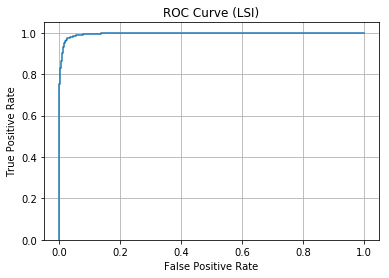

Confusion Matrix: 
[[1500   60]
 [  32 1558]]
Accuracy: 0.9707936507936508
Recall: 0.979874213836478
Precision: 0.9629171817058096
F1-Score: 0.9713216957605986





--------ROC curve and scores for L2 regularization with k=1--------


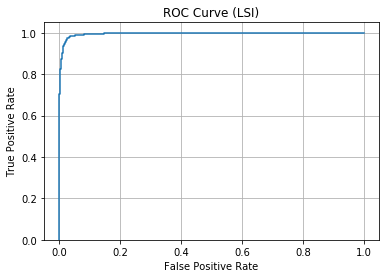

Confusion Matrix: 
[[1500   60]
 [  28 1562]]
Accuracy: 0.9720634920634921
Recall: 0.9823899371069182
Precision: 0.9630086313193588
F1-Score: 0.9726027397260274







In [41]:
"""
QUESTION 5
"""
print("----------- QUESTION 5 -----------")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def logistic_train_plot_score(clf):
    # train a model
    clf.fit(X_train_LSI,y_train)
    
    # plot ROC curve
    test_score = clf.decision_function(X_test_LSI)
    FPR, TPR, threshold = roc_curve(y_test, test_score)
    fig,ax = plt.subplots()
    plt.plot(FPR, TPR)
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (LSI)')
    plt.grid()
    plt.show()
    
    # calculate scores
    y_test_predict = clf.predict(X_test_LSI)
    
    confusionMatrix = confusion_matrix(y_test, y_test_predict)
    accuracy = accuracy_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict)
    f1_score = 2/((1/recall) + (1/precision))   
    print('Confusion Matrix: ')
    print(confusionMatrix)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1-Score:', f1_score)

# ROC curve and scores for logistic regression without regularization
print("--------ROC curve and scores without regularization--------")
clf_logistic = LogisticRegression(C=0.00000000001,random_state=42)
logistic_train_plot_score(clf_logistic)
print('\n\n\n\n')



# 5-fold cross validation to find the best C for L1 regularization and L2 regularization

def score_with_k(pen):
    score_list = []
    k_list = range(-3,4)
    for k in k_list:
        clf = LogisticRegression(penalty=pen, C=10**k, random_state=42)
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        scores = cross_val_score(clf, X_train_LSI, y_train, cv=cv, scoring='f1_macro')
        avg_score = np.average(scores)
        score_list.append(avg_score)
    print("the score list is ",score_list)
    best_k_loc = np.argmax(score_list)
    best_k = k_list[best_k_loc]
    return best_k

# best k for L1-regularization 
print("--------find the best k for L1 regularization--------")
best_k_L1 = score_with_k('l1')
print("the best k for L1 regularization is ",best_k_L1)
print('\n\n\n\n')

# best k for L2-regularization
print("--------find the best k for L2 regularization--------")
best_k_L2 = score_with_k('l2')
print("the best k for L1 regularization is ",best_k_L2)
print('\n\n\n\n')
    
    
# ROC curve and scores for logistic regression with L1 regularization
print("--------ROC curve and scores for L1 regularization with k=1--------")
clf_logistic_L1 = LogisticRegression(penalty='l1',C=10**best_k_L1, random_state=42)
logistic_train_plot_score(clf_logistic_L1)
print('\n\n\n\n')


# ROC curve and scores for logistic regression with L2 regularization
print("--------ROC curve and scores for L2 regularization with k=1--------")
clf_logistic_L2 = LogisticRegression(penalty='l2',C=10**best_k_L2, random_state=42)
logistic_train_plot_score(clf_logistic_L2)
print('\n\n\n\n')